In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [111]:
df = pd.read_csv('/content/smartphones - smartphones.csv')

# Data assessing

- extracting `brand column` from `model column`
- removing unwanted things(rupees symbol and comma) from `price column`
- filling missing values of `rating column` with it's mean
- in `sim column` rename "Wi-Fi" --> "no sim"
- from `sim column` extracting sim type only
- making `is 5g column` from `sim column`
- from `processor column` extracting `processor name` and `no of core `
- from `ram column` extracting `RAM` and `ROM`
- from `battery column` extracting `battery mAh` , `charger watt` , `is fast charging `
- from `display column` extracting `display size in inches` , `resolution` , `Hz` , `notch` .
- from `camera column` extracting `rear camera count` , `rear prmary camera pixel` , `front primary camera `.
- removing `card` and` os` column because of too much nan values
- removing in currect values from each columns .

In [112]:
df.shape

(1020, 11)

In [113]:
df.columns

Index(['model', 'price', 'rating', 'sim', 'processor', 'ram', 'battery',
       'display', 'camera', 'card', 'os'],
      dtype='object')

In [114]:
df.head(3)

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13


In [115]:
df.describe()

,rating
count,879.000000
mean,78.258248
std,7.402854
min,60.000000
25%,74.000000
50%,80.000000
75%,84.000000
max,89.000000


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1020 non-null   object 
 1   price      1020 non-null   object 
 2   rating     879 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1019 non-null   object 
 9   card       1013 non-null   object 
 10  os         1003 non-null   object 
dtypes: float64(1), object(10)
memory usage: 87.8+ KB


In [117]:
#making brand column
df['brand'] = df['model'].str.split(' ').str.get(0)

In [118]:
#changing brand datatype to category from object.
df['brand'] = df['brand'].astype('category')

In [119]:
df['selling_price'] = df['price'].str.replace('₹' ,'').str.replace(',','').astype(np.int32)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   model          1020 non-null   object  
 1   price          1020 non-null   object  
 2   rating         879 non-null    float64 
 3   sim            1020 non-null   object  
 4   processor      1020 non-null   object  
 5   ram            1020 non-null   object  
 6   battery        1020 non-null   object  
 7   display        1020 non-null   object  
 8   camera         1019 non-null   object  
 9   card           1013 non-null   object  
 10  os             1003 non-null   object  
 11  brand          1020 non-null   category
 12  selling_price  1020 non-null   int32   
dtypes: category(1), float64(1), int32(1), object(10)
memory usage: 95.3+ KB


In [121]:
df.head(3)

,model,price,rating,sim,processor,ram,battery,display,camera,card,os,brand,selling_price
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13,OnePlus,54999
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,OnePlus,19989
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13,Samsung,16499


In [122]:
df['rating'] = df['rating'].fillna(round(df['rating'].mean()) )

In [123]:
df['sim'] [df['sim'] == 'Wi-Fi']

754    Wi-Fi
Name: sim, dtype: object

In [124]:
df['sim'].loc[754] = 'No Sim'

<ipython-input-124-58b161b404a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sim'].loc[754] = 'No Sim'


In [125]:
df['sim type'] = df['sim'].str.split(',').str.get(0).astype('category')

In [126]:
def is_5G(series):

  if '5G' in series:
    return 1
  else :
    return 0

In [127]:
df['is 5G'] = df['sim'].apply(is_5G)

<Axes: ylabel='count'>

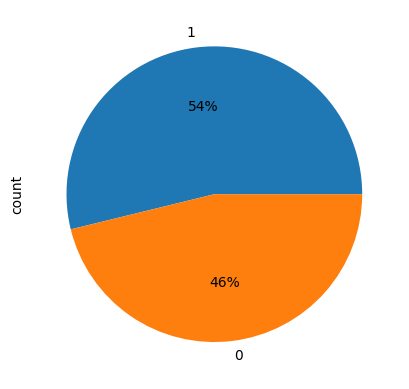

In [128]:
df['is 5G'].value_counts().plot(kind = 'pie' , autopct = '%0.f%%')

In [129]:
# def find_mis(series):
#   if ('Battery' in series )  or ('inbuilt' in series)  or ('No' in series) :
#     return np.nan
#   else :
#     return series

In [130]:
type(df['processor'].iloc[376])

str

In [131]:
def find_cores(series):
  if 'Dual' in series:
    return 2
  elif 'Quad' in series :
    return 4
  elif 'Hex' in series:
    return 6
  elif 'Octa' in series:
    return 8
  else :
    return 1

<Axes: ylabel='count'>

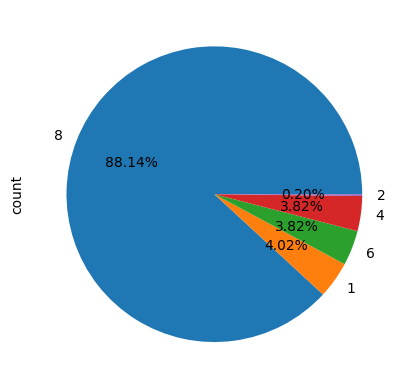

In [132]:
df['processor'].apply(find_cores).value_counts().plot(kind='pie' , autopct = '%0.2f%%')

In [133]:
df['cores'] = df['processor'].apply(find_cores)

In [134]:
df['processor']

0       Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor
1          Snapdragon 695, Octa Core, 2.2 GHz Processor
2             Exynos 1330, Octa Core, 2.4 GHz Processor
3         Snapdragon  695, Octa Core, 2.2 GHz Processor
4          Dimensity 1080, Octa Core, 2.6 GHz Processor
                             ...                       
1015      Snapdragon 8 Gen1, Octa Core, 3 GHz Processor
1016     Snapdragon  480+, Octa Core, 2.2 GHz Processor
1017      Dimensity 8100, Octa Core, 2.85 GHz Processor
1018       Snapdragon 695, Octa Core, 2.2 GHz Processor
1019                                Octa Core Processor
Name: processor, Length: 1020, dtype: object

In [135]:
df['ram'].apply(lambda x : x if 'MB' in x else np.nan).dropna()

155     4 GB RAM, 512 MB inbuilt
271     512 MB RAM, 4 GB inbuilt
400     512 MB RAM, 4 GB inbuilt
473    128 MB RAM, 48 MB inbuilt
486     512 MB RAM, 4 GB inbuilt
533    64 MB RAM, 128 MB inbuilt
573       4 MB RAM, 4 MB inbuilt
627    64 MB RAM, 128 MB inbuilt
685      8 MB RAM, 16 MB inbuilt
835     32 MB RAM, 32 MB inbuilt
846     32 MB RAM, 32 MB inbuilt
852    64 MB RAM, 128 MB inbuilt
873     48 MB RAM, 48 MB inbuilt
881       4 MB RAM, 4 MB inbuilt
917                 4 MB inbuilt
932     16 MB RAM, 16 MB inbuilt
Name: ram, dtype: object

In [136]:
def find_ram(x):
  if 'RAM' in x:
    ram_part = x.split(',')[0]

    return ram_part.split(' RAM')[0]
  else :
    return np.nan

In [137]:
df['RAM'] = df['ram'].apply(find_ram).astype('category')

In [138]:
def find_rom(x):

  if 'inbuilt' in x:

    if len(x.split(', ')) == 1:
      return x.split(' inbuilt')[0]
    else :
      return x.split(', ')[1].split(' inbuilt')[0]

  else :
    return np.nan


In [139]:
df['ROM'] = df['ram'].apply(find_rom).astype('category')

In [140]:
df['ram'].apply(lambda x:np.nan if 'inbuilt' in x else x).dropna()

376                          Unisoc T107
532       Single Core, 208 MHz Processor
551                                 T117
582                          Unisoc T107
608                     1325 mAh Battery
611         Dual Core, 500 MHz Processor
640                      800 mAh Battery
645     3.6 inches, 240 x 320 px Display
647                     1750 mAh Battery
657                      200 mAh Battery
665                     1200 mAh Battery
699     1.5 inches, 120 x 120 px Display
748     2.4 inches, 240 x 320 px Display
754      4 inches, 640 x 1136 px Display
757                     1000 mAh Battery
817                                 T117
857                     1470 mAh Battery
882                          Unisoc T107
925                     1200 mAh Battery
927                      800 mAh Battery
930                     1800 mAh Battery
988                     1200 mAh Battery
1000                             No Wifi
Name: ram, dtype: object

In [141]:
df['battery'].apply(lambda x : np.nan if 'mAh' in x else x).dropna()

111     6.1 inches, 1170 x 2532 px Display with Large ...
149                    5.4 inches, 1080 x 2340 px Display
307     6.1 inches, 1170 x 2532 px Display with Large ...
363                    5.4 inches, 1080 x 2340 px Display
376                             48 MB RAM, 128 MB inbuilt
439                     4.7 inches, 750 x 1334 px Display
448     6.06 inches, 1170 x 2532 px, 120 Hz Display wi...
551                             64 MB RAM, 128 MB inbuilt
582                             48 MB RAM, 128 MB inbuilt
608                       4 inches, 720 x 1280 px Display
611                              32 MB RAM, 32 MB inbuilt
628     6.1 inches, 1170 x 2532 px Display with Large ...
640                     1.77 inches, 128 x 160 px Display
645                         5 MP Rear & 5 MP Front Camera
647                      1.8 inches, 160 x 128 px Display
657                       0.49 inches, 64 x 32 px Display
665                      1.8 inches, 160 x 128 px Display
699           

In [142]:
def find_mah(x):

  if 'mAh' in x :
    return x.split('mAh')[0].strip()
  else :
    return np.nan

In [143]:
df['battery_mAh'] = df['battery'].apply(find_mah).astype('category')

In [144]:
def find_wat(x):

  lst = x.split(' ')

  for i , word in enumerate(lst):
    if word == 'with':

      if lst[i+1] == 'Fast':
        return np.nan
      elif 'W' in lst[i+1] or 'w' in lst[i+1]:
        return lst[i+1]

      break


  return np.nan

In [145]:
df['charger'] = df['battery'].apply(find_wat).astype('category')

In [146]:
def is_fast(x):
  if 'Fast' in x :
    return 1
  else :
    return 0

In [147]:
df['is_fast'] = df['battery'].apply(is_fast).astype('category')

In [148]:
df['display'].apply(lambda x : np.nan if 'Display' in x else x).dropna()

111          12 MP + 12 MP Dual Rear & 12 MP Front Camera
149          12 MP + 12 MP Dual Rear & 12 MP Front Camera
307          12 MP + 12 MP Dual Rear & 12 MP Front Camera
363          12 MP + 12 MP Dual Rear & 12 MP Front Camera
376                                      1450 mAh Battery
439                        12 MP Rear & 7 MP Front Camera
448     50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...
551                                      1900 mAh Battery
582                                      1450 mAh Battery
608                       2 MP Rear & 0.3 MP Front Camera
611                                      3000 mAh Battery
628     12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...
640                                        No Rear Camera
645                     Memory Card Supported, upto 32 GB
647                                        No Rear Camera
657                                        No Rear Camera
665                                        No Rear Camera
699           

In [149]:
def find_disp_size(x):
  if 'inches' in x:
    return x.split(' inches')[0]
  else :
    return np.nan

In [150]:
df['display_size'] = df['display'].apply(find_disp_size)

In [151]:
def find_hz(x):
  if 'Hz' in x:
    temp = x.split(',')[2]
    return temp.split(' ')[1]
  else :
    return np.nan

In [152]:
df['refresh rate'] = df['display'].apply(find_hz).astype('category')

In [153]:
def find_notches(x):
  if 'with' in x :
    temp = x.split('with ')[1]

    return temp.replace(' Notch' ,'') if 'Notch' in temp else temp
  else :
    return np.nan

In [154]:
df['notch'] = df['display'].apply(find_notches).astype('category')

In [155]:
df['camera'] = df['camera'].str.replace('\u2009' ,' ' )

In [156]:
df['camera'].iloc[699] = str(df['camera'].iloc[699])

<ipython-input-156-7202725635eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['camera'].iloc[699] = str(df['camera'].iloc[699])


In [157]:
df['camera'].apply(lambda x : np.nan if 'MP' in x else x).dropna()

69         Foldable Display, Dual Display
98                       Foldable Display
111             Memory Card Not Supported
149             Memory Card Not Supported
155                          Dual Display
                      ...                
954                      Foldable Display
988     Memory Card Supported, upto 32 GB
993                      Foldable Display
1000    1.77 inches, 240 x 320 px Display
1014                     Foldable Display
Name: camera, Length: 66, dtype: object

In [158]:
def find_rear_no(x):
  if 'MP' in x :
    temp = x.split('&')[0].split(' ')[-3]

    if temp in ['Triple', 'Dual' , 'Quad']:
      return temp
    else :
      return 'Single'
  else :
    return  np.nan

In [159]:
df['rear camera count'] = df['camera'].apply(find_rear_no).astype('category')

In [160]:
def find_primary_rear_cam(x):
  if 'MP' in x:
    return x.split(' ')[0]
  else :
    return 0

In [161]:
df['rear primary cam'] = df['camera'].apply(find_primary_rear_cam).astype(np.float16)

In [162]:
def find_front_primary_cam(x):
  if 'Front' in x:
    return x.split('&')[1].split(' ')[1]
  else:
    return 0

In [163]:
df['front primary cam'] = df['camera'].apply(find_front_primary_cam).astype(np.float16)

In [164]:
df['card'][df['card'].isnull()]

573    NaN
647    NaN
699    NaN
835    NaN
881    NaN
927    NaN
932    NaN
Name: card, dtype: object

In [165]:
type(df['card'].iloc[573])

float

In [166]:
lst = list(df['card'][df['card'].isnull()].index)
lst

[573, 647, 699, 835, 881, 927, 932]

In [167]:
for i in lst:
  df['card'].iloc[i] = str(df['card'].iloc[i])

<ipython-input-167-099c58e1c529>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['card'].iloc[i] = str(df['card'].iloc[i])


In [168]:
df['card']

0              Memory Card Not Supported
1        Memory Card (Hybrid), upto 1 TB
2       Memory Card Supported, upto 1 TB
3        Memory Card (Hybrid), upto 1 TB
4              Memory Card Not Supported
                      ...               
1015                         Android v12
1016    Memory Card Supported, upto 1 TB
1017           Memory Card Not Supported
1018    Memory Card Supported, upto 1 TB
1019    Memory Card Supported, upto 1 TB
Name: card, Length: 1020, dtype: object

In [169]:
(df['card'].apply(lambda x : np.nan if 'Card' in x else x).dropna().shape[0] / df['card'].shape[0] ) * 100

27.35294117647059

In [170]:
lst = list(df['os'] [df['os'].isnull()].index)
print(lst)

[473, 532, 573, 608, 640, 645, 647, 657, 665, 699, 748, 757, 835, 857, 881, 927, 932]


In [171]:
for i in lst:
  print(type(df['os'].iloc[i]))

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>


In [172]:
for i in lst :
  df['os'].iloc[i] = str(df['os'].iloc[i])

<ipython-input-172-42073413060a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['os'].iloc[i] = str(df['os'].iloc[i])


In [173]:
df [df['os'].apply(lambda x : x if ('Android' in x) or ('iOS' in x) or ('Harmony' in x ) or ('EMUI' in x) else np.nan).isnull()] [['model' ,'brand', 'os']]

,model,brand,os
8,Nothing Phone 1,Nothing,No FM Radio
9,OnePlus Nord 2T 5G,OnePlus,No FM Radio
12,Xiaomi Redmi Note 12 Pro 5G,Xiaomi,No FM Radio
17,OPPO Reno 9 Pro Plus,OPPO,No FM Radio
18,OnePlus 10R 5G,OnePlus,Bluetooth
...,...,...,...
1009,Xiaomi Civi 3,Xiaomi,No FM Radio
1011,Oppo Find X6,Oppo,No FM Radio
1012,itel A23s,itel,No FM Radio
1013,Google Pixel 8 Pro,Google,No FM Radio


In [174]:
lst = list(df [df['os'].apply(lambda x : x if ('Android' in x) or ('iOS' in x) or ('Harmony' in x ) or ('EMUI' in x) else np.nan).isnull()]['brand'].unique())

In [175]:
len(lst)

38

In [176]:
print(lst)

['Nothing', 'OnePlus', 'Xiaomi', 'OPPO', 'Vivo', 'Samsung', 'iQOO', 'Motorola', 'Tecno', 'Apple', 'Nokia', 'Oppo', 'Letv', 'LeEco', 'Honor', 'Google', 'Realme', 'Nubia', 'Royole', 'Poco', 'itel', 'Jio', 'Asus', 'Huawei', 'Itel', 'ZTE', 'Lenovo', 'LG', 'Namotel', 'Eunity', 'Oukitel', 'Zanco', 'Karbonn', 'CAT', 'DIZO', 'BlackZone', 'iKall', 'XTouch']


In [177]:
df[df[['brand']] == 'Nothing']['brand'].dropna()

8      Nothing
133    Nothing
206    Nothing
269    Nothing
944    Nothing
Name: brand, dtype: category
Categories (56, object): ['Apple', 'Asus', 'BLU', 'BlackZone', ..., 'Zanco', 'iKall', 'iQOO', 'itel']

In [178]:
df[['brand' , 'os']].iloc[944]

brand        Nothing
os       No FM Radio
Name: 944, dtype: object

In [179]:
df.columns

Index(['model', 'price', 'rating', 'sim', 'processor', 'ram', 'battery',
       'display', 'camera', 'card', 'os', 'brand', 'selling_price', 'sim type',
       'is 5G', 'cores', 'RAM', 'ROM', 'battery_mAh', 'charger', 'is_fast',
       'display_size', 'refresh rate', 'notch', 'rear camera count',
       'rear primary cam', 'front primary cam'],
      dtype='object')

In [180]:
def os(x):
  print(x)

In [181]:
df[df['brand']=='Nothing'].apply(os)

8                         Nothing Phone 1
133     Nothing Phone 1 (8GB RAM + 256GB)
206    Nothing Phone 1 (12GB RAM + 256GB)
269                       Nothing Phone 2
944                  Nothing Phone 1 Lite
Name: model, dtype: object
8      ₹26,749
133    ₹28,249
206    ₹35,999
269    ₹39,990
944    ₹24,990
Name: price, dtype: object
8      85.0
133    86.0
206    87.0
269    88.0
944    80.0
Name: rating, dtype: float64
8      Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC
133    Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC
206    Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC
269    Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC
944    Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC
Name: sim, dtype: object
8      Snapdragon 778G Plus, Octa Core, 2.5 GHz Proce...
133    Snapdragon 778G Plus, Octa Core, 2.5 GHz Proce...
206    Snapdragon 778G Plus, Octa Core, 2.5 GHz Proce...
269     Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor
944    Snapdragon 778G Plus, Octa Core, 2.5 GHz Proce...
Name: processor, dtype: obj

model                None
price                None
rating               None
sim                  None
processor            None
ram                  None
battery              None
display              None
camera               None
card                 None
os                   None
brand                None
selling_price        None
sim type             None
is 5G                None
cores                None
RAM                  None
ROM                  None
battery_mAh          None
charger              None
is_fast              None
display_size         None
refresh rate         None
notch                None
rear camera count    None
rear primary cam     None
front primary cam    None
dtype: object

In [182]:
df['os'].apply(lambda x : x if ('Android' in x) or ('iOS' in x) or ('Harmony' in x ) or ('EMUI' in x) else np.nan).dropna()

0       Android v13
1       Android v12
2       Android v13
3       Android v12
4       Android v13
           ...     
1014    Android v12
1016    Android v11
1017    Android v12
1018    Android v12
1019    Android v12
Name: os, Length: 741, dtype: object

In [183]:
df.columns

Index(['model', 'price', 'rating', 'sim', 'processor', 'ram', 'battery',
       'display', 'camera', 'card', 'os', 'brand', 'selling_price', 'sim type',
       'is 5G', 'cores', 'RAM', 'ROM', 'battery_mAh', 'charger', 'is_fast',
       'display_size', 'refresh rate', 'notch', 'rear camera count',
       'rear primary cam', 'front primary cam'],
      dtype='object')

In [184]:
phone=df[['model','brand','selling_price', 'sim type',
       'is 5G', 'cores', 'RAM', 'ROM', 'battery_mAh', 'charger', 'is_fast',
       'display_size', 'refresh rate', 'notch', 'rear camera count',
       'rear primary cam', 'front primary cam']].copy()

In [185]:
phone.head(3)

,model,brand,selling_price,sim type,is 5G,cores,RAM,ROM,battery_mAh,charger,is_fast,display_size,refresh rate,notch,rear camera count,rear primary cam,front primary cam
0,OnePlus 11 5G,OnePlus,54999,Dual Sim,1,8,12 GB,256 GB,5000,100W,1,6.7,120,Punch Hole,Triple,50.0,16.0
1,OnePlus Nord CE 2 Lite 5G,OnePlus,19989,Dual Sim,1,8,6 GB,128 GB,5000,33W,1,6.59,120,Punch Hole,Triple,64.0,16.0
2,Samsung Galaxy A14 5G,Samsung,16499,Dual Sim,1,8,4 GB,64 GB,5000,15W,1,6.6,90,Water Drop,Triple,50.0,13.0


In [186]:
phone.isnull().sum()

model                  0
brand                  0
selling_price          0
sim type               0
is 5G                  0
cores                  0
RAM                   27
ROM                   23
battery_mAh           33
charger              251
is_fast                0
display_size          33
refresh rate         409
notch                135
rear camera count     66
rear primary cam       0
front primary cam      0
dtype: int64

In [187]:
phone [phone['RAM'].isnull()]

,model,brand,selling_price,sim type,is 5G,cores,RAM,ROM,battery_mAh,charger,is_fast,display_size,refresh rate,notch,rear camera count,rear primary cam,front primary cam
376,Nokia 2660 Flip,Nokia,4649,Dual Sim,0,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.000000,0.0
439,Apple iPhone SE 3 2022,Apple,43900,Dual Sim,1,6,NaN,64 GB,NaN,NaN,0,NaN,NaN,NaN,NaN,0.000000,0.0
483,Huawei Mate 50 RS Porsche Design,Huawei,239999,Dual Sim,0,8,NaN,512 GB,4700,66W,1,6.74,120,NaN,Triple,50.000000,13.0
532,Samsung Guru Music 2 Dual Sim,Samsung,1949,Dual Sim,0,1,NaN,NaN,800,NaN,0,2,NaN,NaN,NaN,0.000000,0.0
551,itel Magic 2 4G,itel,2399,Dual Sim,0,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.000000,0.0
582,Nokia 8210 4G,Nokia,3749,Dual Sim,0,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.000000,0.0
608,Namotel Achhe Din,Namotel,99,Dual Sim,0,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.000000,0.0
611,Eunity U1 5605N,Eunity,699,Dual Sim,0,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.000000,0.0
640,Nokia 105 Plus,Nokia,1299,Dual Sim,0,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.000000,0.0
645,Nokia 2760 Flip,Nokia,5490,Dual Sim,0,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.000000,0.0


In [188]:
phone.dropna(subset =['RAM' , 'ROM'] , inplace = True)

In [189]:
phone.shape

(993, 17)

In [190]:
phone['ROM'].isnull().sum()

0

In [191]:
phone[phone['battery_mAh'].isnull()]

,model,brand,selling_price,sim type,is 5G,cores,RAM,ROM,battery_mAh,charger,is_fast,display_size,refresh rate,notch,rear camera count,rear primary cam,front primary cam
111,Apple iPhone 12,Apple,51999,Dual Sim,1,6,4 GB,64 GB,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,0.0
149,Apple iPhone 12 Mini,Apple,40999,Dual Sim,1,6,4 GB,64 GB,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,0.0
307,Apple iPhone 12 (128GB),Apple,55999,Dual Sim,1,6,4 GB,128 GB,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,0.0
363,Apple iPhone 12 Mini (128GB),Apple,45999,Dual Sim,1,6,4 GB,128 GB,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,0.0
448,Apple iPhone 15 Pro,Apple,130990,Dual Sim,1,1,8 GB,128 GB,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,0.0
628,Apple iPhone 12 Pro (512GB),Apple,139900,Dual Sim,1,6,6 GB,512 GB,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,0.0
853,Apple iPhone 12 Pro (256GB),Apple,119900,Dual Sim,1,6,6 GB,256 GB,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,0.0
913,Apple iPhone 12 Mini (256GB),Apple,55999,Dual Sim,1,6,4 GB,256 GB,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,0.0
914,Apple iPhone 12 (256GB),Apple,67999,Dual Sim,1,6,4 GB,256 GB,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,0.0


In [192]:
phone['battery_mAh'].isnull().sum()

9

In [193]:
phone.dropna(subset = ['battery_mAh'] , inplace = True)

In [194]:
phone['battery_mAh'].isnull().sum()

0

In [195]:
phone.isnull().sum()

model                  0
brand                  0
selling_price          0
sim type               0
is 5G                  0
cores                  0
RAM                    0
ROM                    0
battery_mAh            0
charger              216
is_fast                0
display_size           0
refresh rate         374
notch                 99
rear camera count     32
rear primary cam       0
front primary cam      0
dtype: int64

In [196]:
phone['charger'].value_counts()

charger
33W      152
18W      128
67W       65
25W       53
120W      46
15W       43
80W       42
66W       36
10W       33
30W       32
65W       30
44W       23
45W       17
20W       10
68W        7
100W       7
150W       7
125W       6
22.5W      5
40W        5
60W        4
55W        3
21W        2
50W        2
210W       2
180W       1
19W        1
200W       1
165W       1
135W       1
68.2W      1
27W        1
240W       1
Name: count, dtype: int64

In [197]:
phone.drop(columns = ['charger'] ,inplace = True)

In [198]:
phone.columns

Index(['model', 'brand', 'selling_price', 'sim type', 'is 5G', 'cores', 'RAM',
       'ROM', 'battery_mAh', 'is_fast', 'display_size', 'refresh rate',
       'notch', 'rear camera count', 'rear primary cam', 'front primary cam'],
      dtype='object')

In [199]:
phone['refresh rate'].value_counts()

refresh rate
120    342
90     219
144     39
165      9
240      1
Name: count, dtype: int64

In [200]:
# supposing nan mobiles has highest refresh rate in the column
phone['refresh rate'].fillna(phone['refresh rate'].value_counts().index[0] , inplace = True)

In [201]:
phone['notch'].value_counts()

notch
Punch Hole         532
Water Drop         309
Small               25
Large               13
Dual Punch Hole      6
Name: count, dtype: int64

In [202]:
phone['notch'].fillna(phone['notch'].value_counts().index[0] , inplace = True)

In [203]:
phone['notch'].value_counts()

notch
Punch Hole         631
Water Drop         309
Small               25
Large               13
Dual Punch Hole      6
Name: count, dtype: int64

In [204]:
phone['rear camera count'].value_counts()

rear camera count
Triple    531
Dual      197
Quad      152
Single     72
Name: count, dtype: int64

In [205]:
phone['rear camera count'].fillna(phone['rear camera count'].value_counts().index[0] , inplace = True)

In [206]:
phone.isnull().sum()

model                0
brand                0
selling_price        0
sim type             0
is 5G                0
cores                0
RAM                  0
ROM                  0
battery_mAh          0
is_fast              0
display_size         0
refresh rate         0
notch                0
rear camera count    0
rear primary cam     0
front primary cam    0
dtype: int64

In [207]:
df = phone.copy()

In [208]:
df.to_csv('phones clearned.csv' , index = False)